In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from skimage import io
import skimage.filters
from skimage.transform import resize


from google.colab import drive, files
drive.mount('/content/drive') # mount your google colab file

Mounted at /content/drive


In [ ]:
from itertools import chain

SIZE = 256  #Resize images

#Capture training data and labels into respective lists
images = []
labels = []

for directory_path in glob.glob("/content/drive/MyDrive/ML_IPData7/*"):
    label = directory_path.split("/")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = io.imread(img_path)
        if len(img.shape) == 3:
          img = resize(img, (SIZE, SIZE))
          images.append(img)
          labels.append(label)

Rifle
Golf cart


In [ ]:
images = np.array(images)

type(labels)
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
labelencoder = LabelEncoder()

labelencoder.fit(labels)
enc_labels = labelencoder.transform(labels)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score


num_images, height, width, channels = images.shape
images = images.reshape(num_images, height*width*channels)

X_train, X_test, y_train, y_test = train_test_split(images, enc_labels, test_size = 0.2, random_state = 0)

Text(0, 0.5, 'Cumulated variance')

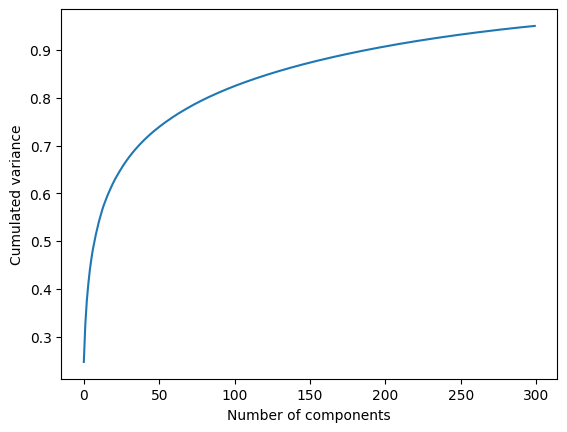

In [ ]:
from sklearn.decomposition import PCA
pca_tr = PCA(n_components=300)
pca_tr.fit(X_train)

plt.plot(np.cumsum(pca_tr.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Cumulated variance")

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_resampled, y_train_resampled = smote.fit_resample(pca_tr.transform(X_train), y_train)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import math

knn = KNeighborsClassifier(n_neighbors = round(math.sqrt(len(images))) // 3)
knn.fit(pca_tr.transform(X_train), y_train)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
y_pred = knn.predict(pca_tr.transform(X_test))

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

train_accuracy = knn.score(pca_tr.transform(X_train), y_train)
test_accuracy = (knn.score(pca_tr.transform(X_test), y_test))

precision_score =  precision_score(y_test, y_pred, average='macro')
recall_score = recall_score(y_test, y_pred, average='macro')
f1_score = 2 * (precision_score * recall_score) / (precision_score + recall_score)



print("train accuracy: {}%".format(train_accuracy*100))
print("test accuracy: {}%".format(test_accuracy*100))
print("Error: {}%".format((1-test_accuracy)*100))
print("Recall {}: ".format(recall_score))
print("F1 Score : {}".format(f1_score))

train accuracy: 86.97183098591549%
test accuracy: 86.61971830985915%
Error: 13.38028169014085%
Recall 0.5476190476190477: 
F1 Score : 0.6899206987702563
